In [2]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

digits.target

dir(digits)

digits.target_names

df = pd.DataFrame(digits.data,digits.target)
df.head()

df['target'] = digits.target
df.head(20)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('target',axis='columns'), df.target, test_size=0.3)

"""Using RBF kernel"""

from sklearn.svm import SVC
rbf_model = SVC(kernel='rbf')

len(X_train)

len(X_test)

rbf_model.fit(X_train, y_train)

rbf_model.score(X_test,y_test)

"""Using Linear kernel"""

linear_model = SVC(kernel='linear')
linear_model.fit(X_train,y_train)

linear_model.score(X_test,y_test)

0.9814814814814815

Saving iris (1).csv to iris (1).csv
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

--- SVM with linear kernel ---
Accuracy: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


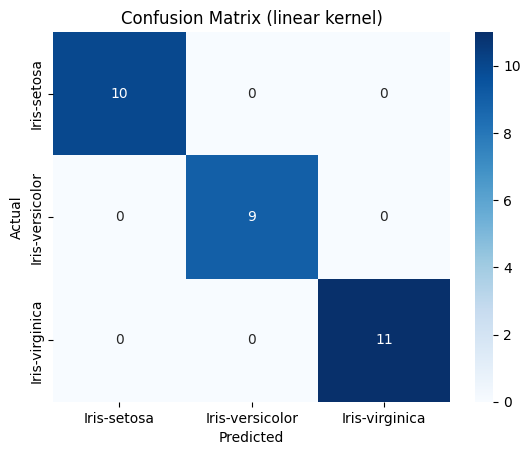


--- SVM with rbf kernel ---
Accuracy: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


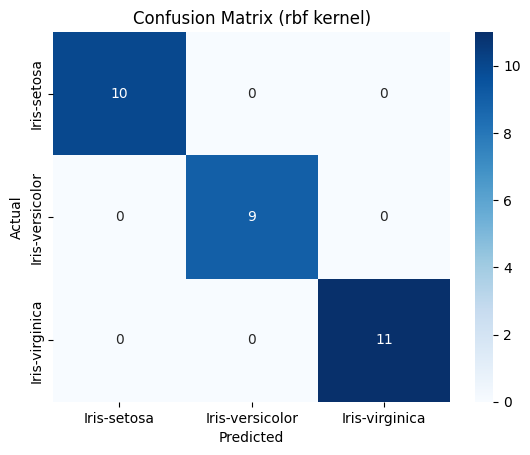

In [4]:
#iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tkinter as tk
from tkinter import filedialog
from google.colab import files
# Upload the CSV file
uploaded = files.upload()
# Read the CSV file into a pandas DataFrame
iris_df = pd.read_csv(next(iter(uploaded)))  # Load the first uploaded file
print(iris_df.head())

# Feature columns and target
X = iris_df.drop("species", axis=1)
y = iris_df["species"]

# Split into training and test set (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate an SVM model
def train_evaluate_svm(kernel_type='linear'):
    model = SVC(kernel=kernel_type)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n--- SVM with {kernel_type} kernel ---")
    print(f"Accuracy: {acc:.2f}")
    print("Confusion Matrix:")
    print(cm)

    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix ({kernel_type} kernel)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Train and evaluate models
train_evaluate_svm(kernel_type='linear')
train_evaluate_svm(kernel_type='rbf')


Saving letter-recognition.csv to letter-recognition (4).csv
  letter  xbox   ybox   width   height  onpix   xbar   ybar   x2bar  y2bar   \
0      T      2      8       3       5       1      8     13      0       6   
1      I      5     12       3       7       2     10      5      5       4   
2      D      4     11       6       8       6     10      6      2       6   
3      N      7     11       6       6       3      5      9      4       6   
4      G      2      1       3       1       1      8      6      6       6   

   xybar   x2ybar  xy2bar  xedge   xedgey  yedge   yedgex  
0       6      10       8       0       8       0       8  
1      13       3       9       2       8       4      10  
2      10       3       7       3       7       3       9  
3       4       4      10       6      10       2       8  
4       6       5       9       1       7       5      10  

Accuracy Score: 0.37


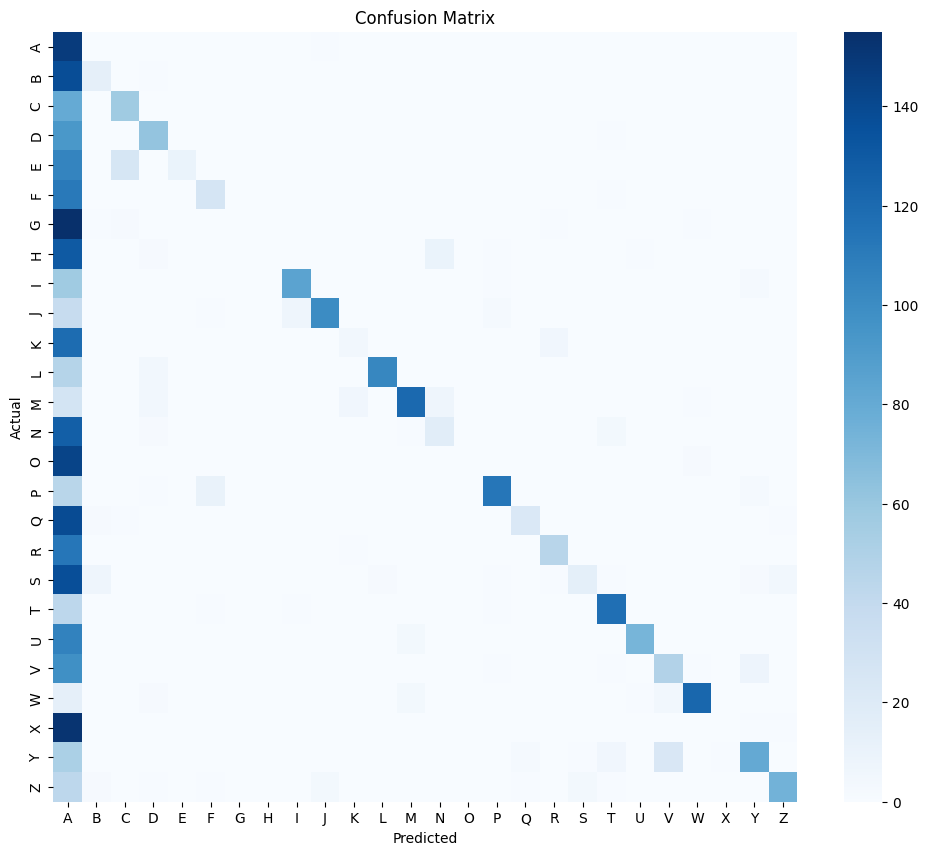

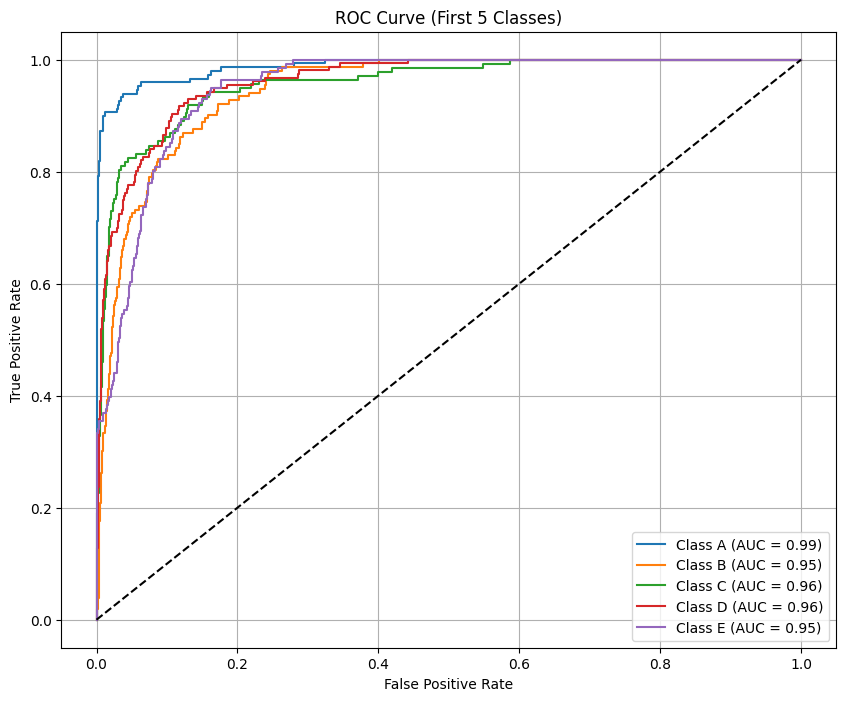

Average AUC Score (macro-average over classes): 0.94


In [3]:
#letter-recognition

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import tkinter as tk
from tkinter import filedialog
import numpy as np
from google.colab import files
# Upload the CSV file
uploaded = files.upload()
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(next(iter(uploaded)))  # Load the first uploaded file
print(df.head())

# Features and labels
X = df.drop("letter", axis=1)
y = df["letter"]

# Binarize labels for ROC and AUC
classes = sorted(y.unique())
y_bin = label_binarize(y, classes=classes)

# Train-test split
X_train, X_test, y_train, y_test, y_bin_train, y_bin_test = train_test_split(
    X, y, y_bin, test_size=0.2, random_state=42
)

# SVM model (One-vs-Rest for multi-class ROC using LinearSVC)
svm_model = OneVsRestClassifier(LinearSVC())
svm_model.fit(X_train, y_bin_train)

# For predictions:
y_pred_bin = svm_model.predict(X_test)
y_pred_labels = y_pred_bin.argmax(axis=1)
predicted_letters = [classes[i] for i in y_pred_labels]

# Accuracy
y_test_labels = y_test.reset_index(drop=True)
accuracy = accuracy_score(y_test_labels, predicted_letters)
print(f"\nAccuracy Score: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test_labels, predicted_letters, labels=classes)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve & AUC Score using decision_function
y_score = svm_model.decision_function(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_bin_test[:, i], y_score[:, i])
    roc_auc[i] = roc_auc_score(y_bin_test[:, i], y_score[:, i])

# Plot ROC for a few classes (First 5 for simplicity)
plt.figure(figsize=(10, 8))
for i in range(5):  # show first 5 classes for simplicity
    plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve (First 5 Classes)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Average AUC
mean_auc = np.mean(list(roc_auc.values()))
print(f"Average AUC Score (macro-average over classes): {mean_auc:.2f}")
